In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import duckdb
from concurrent.futures import ThreadPoolExecutor, as_completed
import dask.dataframe as dd
import sys
import glob

sys.path.append("../../scripts")
%aimport initial_map
%aimport map_refiner
%aimport complexity
%aimport finder
%aimport preprocess
%aimport complexity
%aimport plotting

import glob
from tqdm import tqdm  # progress bar

# Step 1

Used no post because that's what emily did

In [11]:
EC_AD = finder.Barcode(name = "AD",
                       preceder = "GGCTAGC",
                       post = "",
                       length = 120)

EC_AD_BC = finder.Barcode(name = "AD_BC",
                       preceder = "CGCGCC",
                       post = "",
                       length = 11)

EC_RPTR_BC = finder.Barcode(name = "RPTR_BC",
                       preceder = "CTCGAG",
                       post = "",
                       length = 14)


In [12]:
# step1_mapper = initial_map.InitialMapper(db_path = "/global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/TREBL/duckdb/GCN4.db",
#                                        step_name = "step1", #Should include time point, replicate (don't need to specify BC type(s))
#                                        seq_file = "/global/scratch/projects/fc_mvslab/data/sequencing/CZB_Feb2024/A10_A11/results/A10_S1.fastq.gz.assembled.fastq",
#                                        design_file_path =  "/global/scratch/projects/fc_mvslab/OpenProjects/EChase/TREBLEseq_ismaybethenewcibername/A10_sequencing/v2/current/a10_designfile.csv",
#                                        bc_objects = [EC_AD, EC_AD_BC, EC_RPTR_BC],
#                                        reverse_complement = True)

In [5]:
# Took about 10 minutes
# step1_mapper.create_map()

Base prefix (stable across descriptors): step1_AD_AD_BC_RPTR_BC_
Full prefix for this instance: step1_AD_AD_BC_RPTR_BC_

Using the following step order:
1. initial
2. grouped
3. thresholded
4. unique_target
5. quality_designed



In [ ]:
# step1_mapper.preview_map()

In [ ]:
# refiner = map_refiner.MapRefiner(db_path = "/global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/TREBL/duckdb/GCN4.db",
#                                 bc_objects = [EC_AD, EC_AD_BC, EC_RPTR_BC],
#                                 column_pairs = [( "RPTR_BC", "AD")],
#                                 design_check = True, 
#                                  reads_threshold = 50,
#                                 map_order = ['quality_designed', 'grouped', 'unique_target', 'thresholded'],
#                                 step_name = "step1",
#                                 should_check_exists = True,
#                                 plot_histograms = False)

In [ ]:
# refiner.refine_map_from_db()

In [ ]:
# refiner.save_loss_table()

In [ ]:
# refiner.plot_loss(text_offset = -0.15)

In [15]:
SK_order_refiner = map_refiner.MapRefiner(db_path = "/global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/TREBL/duckdb/GCN4.db",
                                bc_objects = [EC_AD, EC_AD_BC, EC_RPTR_BC],
                                column_pairs = [("RPTR_BC", "AD")],
                                design_check = True, 
                                 reads_threshold = 50,
                                descriptor = "SK_order",
                                map_order = ['grouped', 'thresholded', 'barcode_exists', 'unique_target', 'quality_designed'],
                                step_name = "step1",
                                should_check_exists = True,
                                plot_histograms = True)

Base prefix (stable across descriptors): step1_AD_AD_BC_RPTR_BC_
Full prefix for this instance: step1_AD_AD_BC_RPTR_BC_SK_order_

Using the following step order:
1. initial
2. grouped
3. thresholded
4. barcode_exists
5. unique_target
6. quality_designed



Grouping step1_AD_AD_BC_RPTR_BC_initial...
Skipping — table step1_AD_AD_BC_RPTR_BC_initial_grouped already exists and is initial/grouped.


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

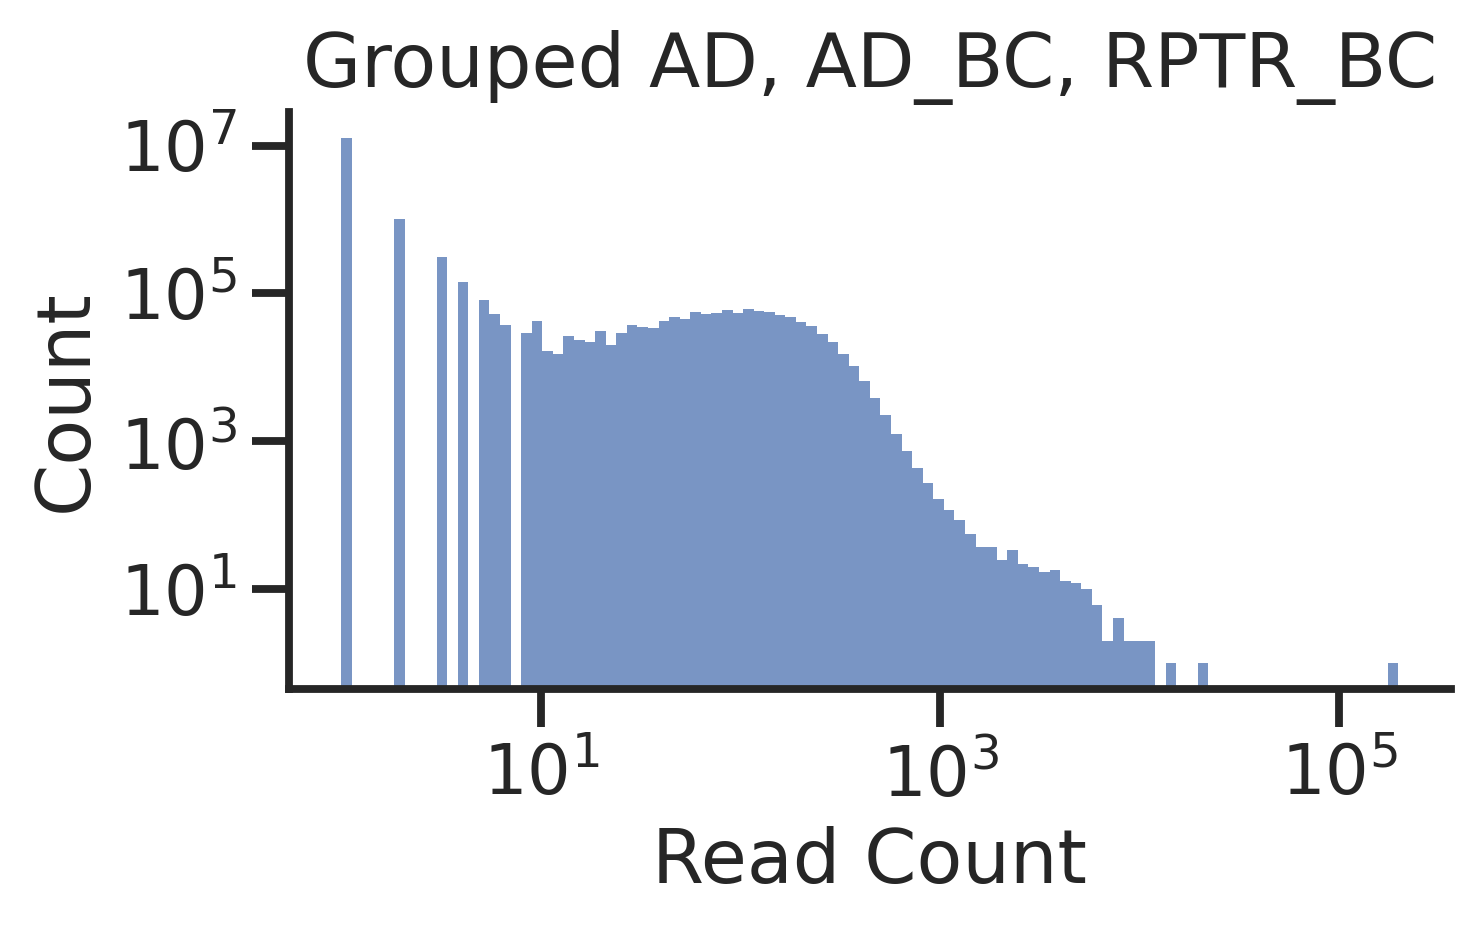

Done in 28.57 seconds.

Thresholding...
Using reads threshold of 50.


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

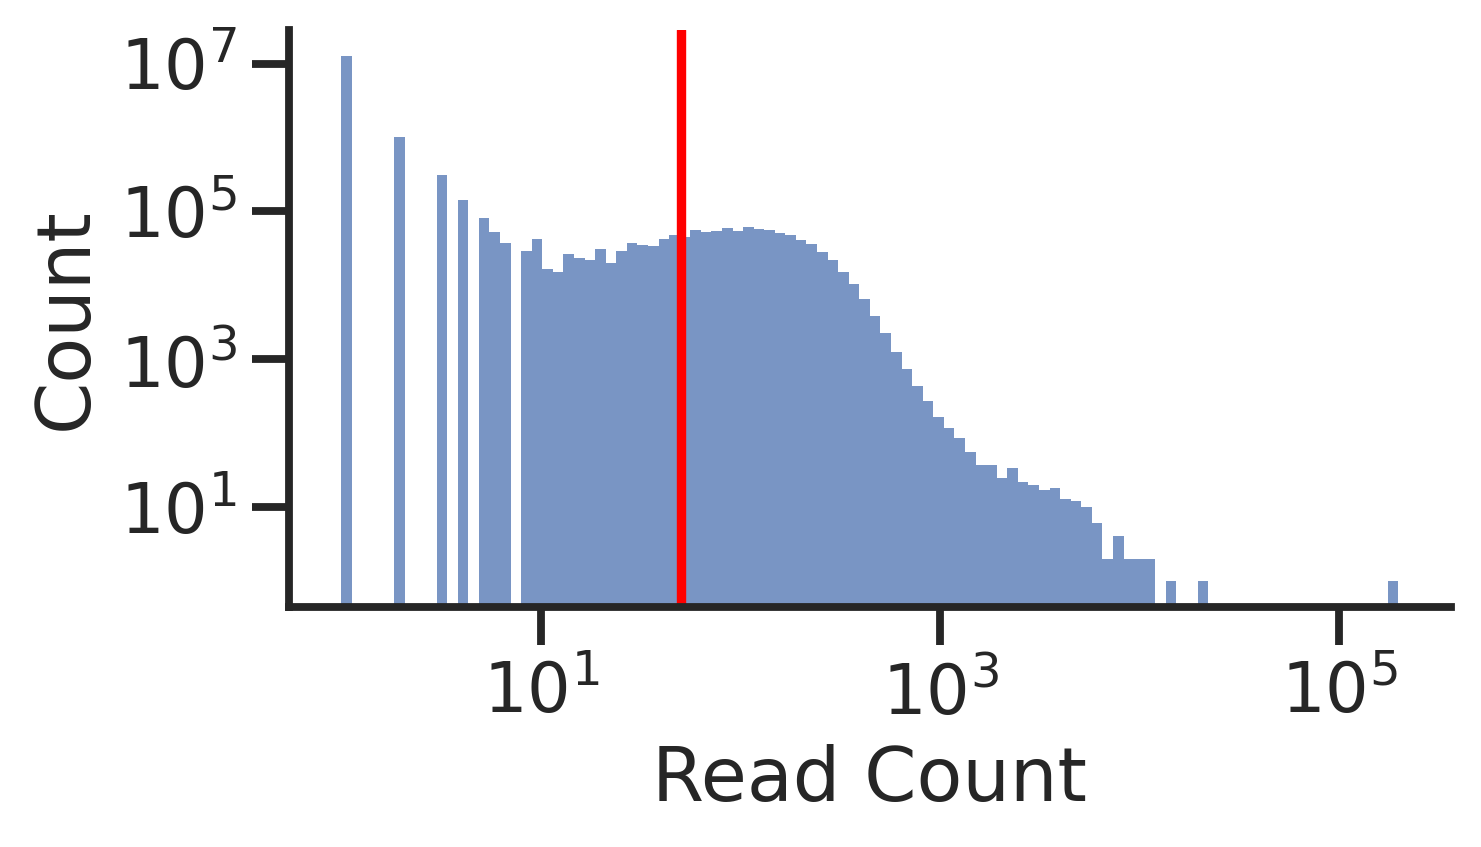

Done in 23.91 seconds.

Removing rows with null or empty barcodes (excluding AD)...
Done in 0.91 seconds.

Filtering keys to keep only those mapping to a single target...
	Checking each RPTR_BC only maps to one AD.
Done in 0.85 seconds.

Filtering to quality and designed...
Done in 0.06 seconds.

Done.


In [16]:
SK_order_refiner.refine_map_from_db()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

Saved loss summary table as 'step1_AD_AD_BC_RPTR_BC_SK_order_loss_summary'
Done in 8.71 seconds.

Saved loss summary table as 'step1_AD_AD_BC_RPTR_BC_SK_order_loss_summary'
Done in 1.68 seconds.



<Axes: xlabel='Read Count (Unique, Total)', ylabel='Map Step'>

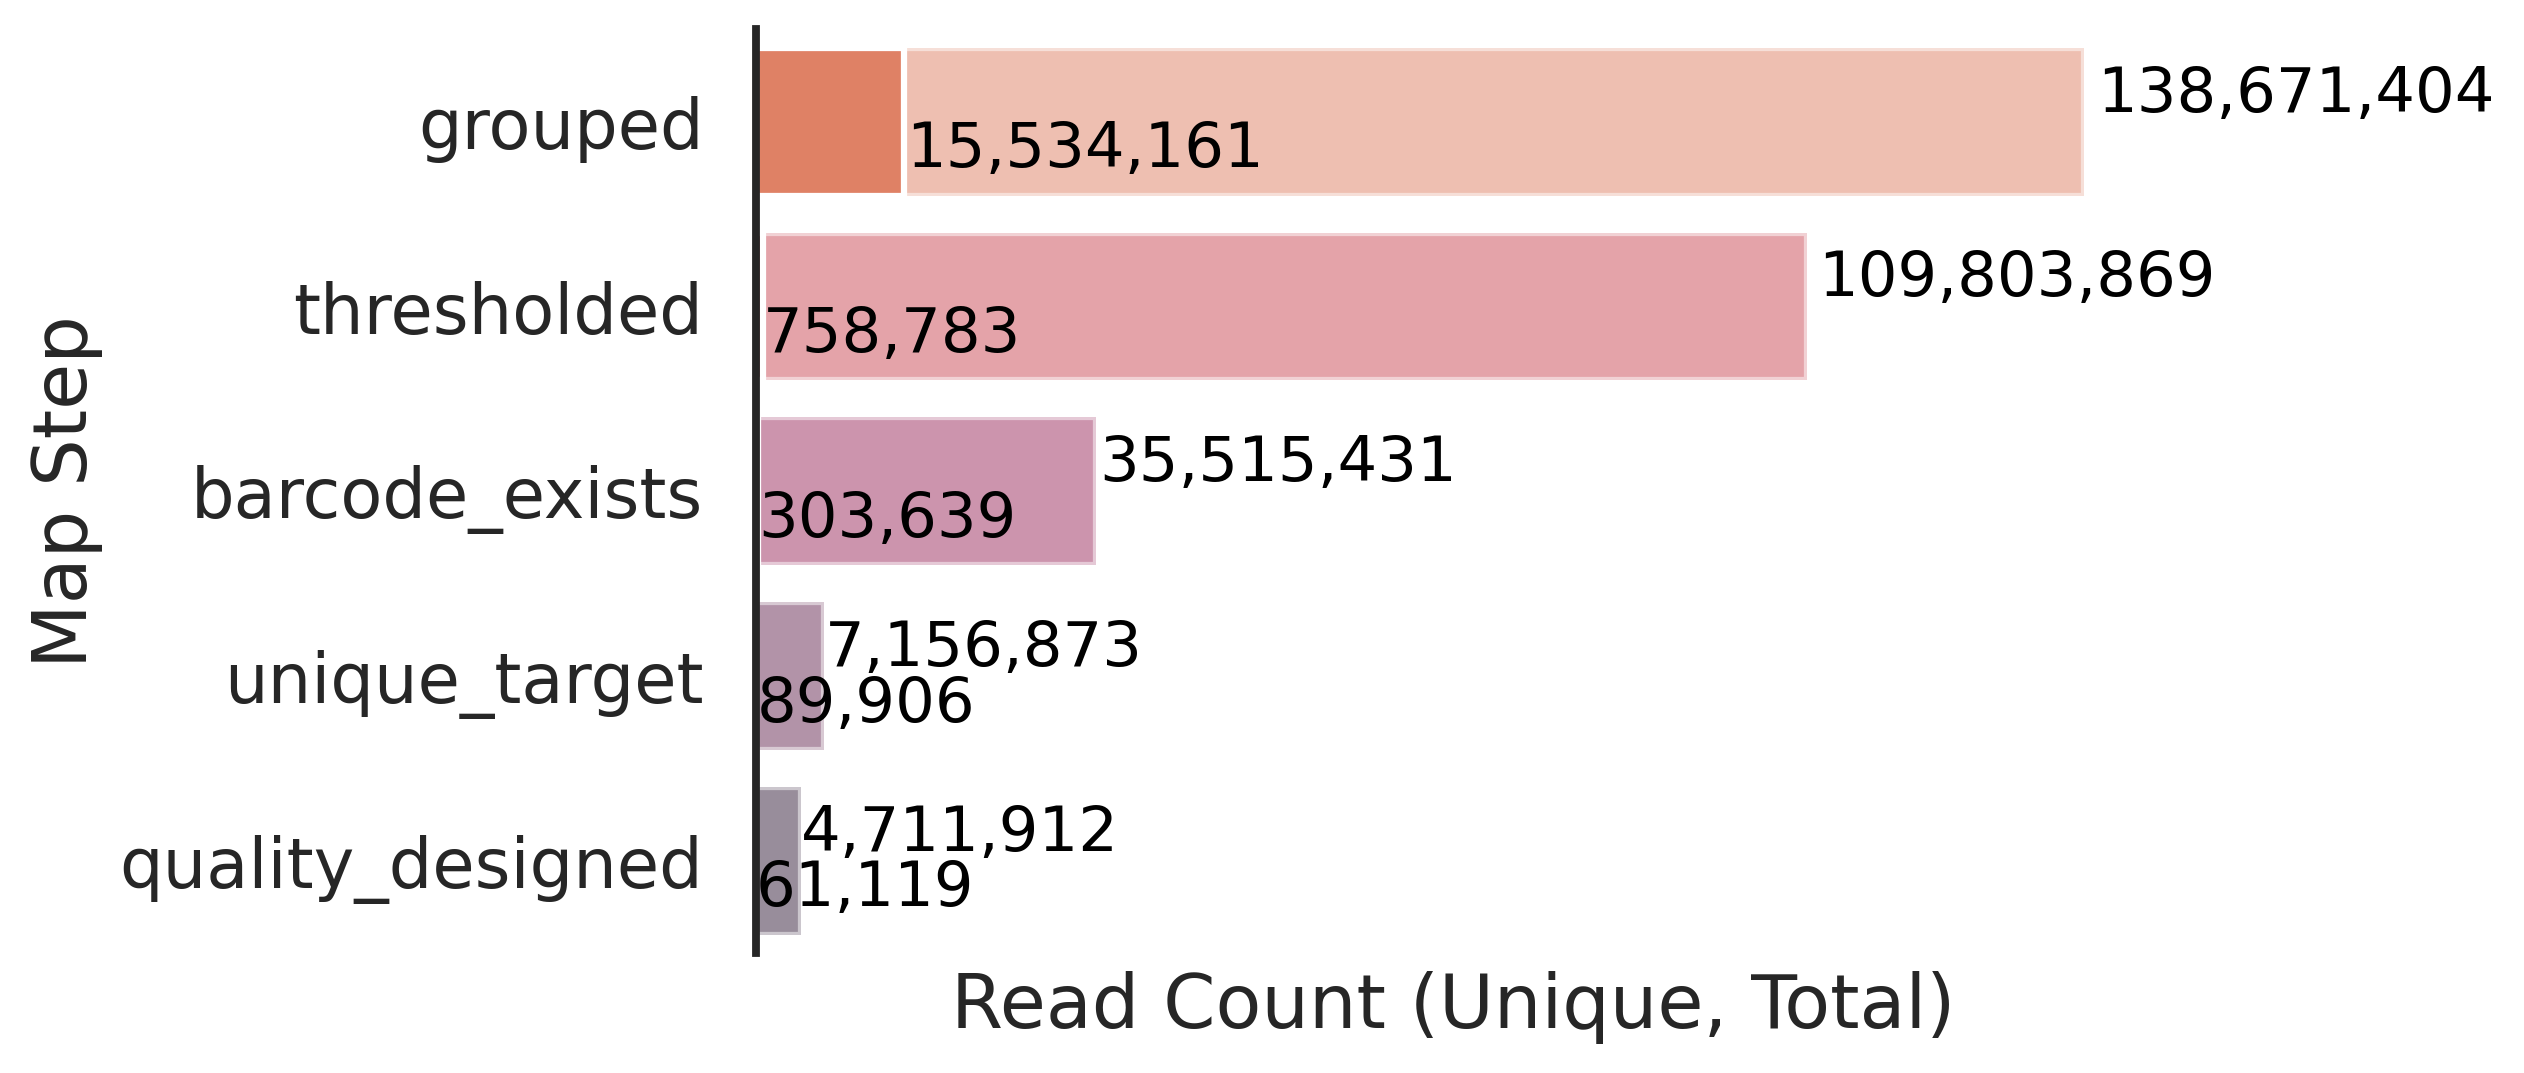

In [10]:
SK_order_refiner.save_loss_table()
SK_order_refiner.plot_loss(text_offset = -0.15)

In [11]:
# 3% of reads at unique_target have no AD
SK_order_refiner.get_map_df('unique_target')["AD"].value_counts() / len(SK_order_refiner.get_map_df('unique_target')["AD"].value_counts() )

AD
                                                                                                                            0.028408
TTGACTGCTTTGACTTCTCCATCTTTGTTTGATGGTTCTCCAGACTTTGATACATTTGATATTTCTCCAAACTTTGGTCATTCTGATTTGGAGAATCCAGATACTTGGTTCTCTTTGTTT    0.000452
TCTACTGATTCTACTCCAATGTTTGAATATGAGAATTTGGAAGATAATTCTAAAGAATGGACTTCTTTGTTTGATAATGATATTCCAGTTACTACTGATGATGTTTCTTTGGCTGATAAA    0.000452
GCTGCTATTCCAGAGAATGAATTGTTGGATGAAGATACTATGAATGCTATTTCTTCTTTGAAGAATGATTTGTCTAATATTTCTAATTCTTTGCCAGCTGAAGCTCCACATGAAATTGCT    0.000388
ACTGACTTTATTGATGAAGAAGTTATTATGTCTATTGTTATTGAAATGGGTATTGATAGAATTAAAGAAATTCCAGAAATTTGGATTGGTCAGAATGAATTTGACTTTATGACTGACTTT    0.000345
                                                                                                                              ...   
TCATTTATGCATGAATCTGTTGAATCTGATGATAAACATTGGAACTCTTTGTTTAAAGAAGAAAGACTTCTTCTGTTGCTGCTATGGAACCACCAGTTCATGTTAAATTGGAAACTATTT    0.000022
AATGATTCTTCTCCAGGTCAATCTTCTTCTAGATCTTCTCATCAAGGTAGACATTCATTTACTTCT

In [ ]:

db_path = "/global/scratch/projects/fc_mvslab/OpenProjects/Marissa/DesignFiles/Gcn4_TREBL_map_20240127.db"

# Read-only connection
ec_con = duckdb.connect(database=db_path, read_only=True)

In [ ]:
# Not sure why I have so many less
ec_con.execute("SELECT COUNT(*) FROM A10_2_T_NODBLMAP_20240422").fetchone()

# Step 1 with post

In [3]:
EC_AD = finder.Barcode(name = "AD",
                       preceder = "GGCTAGC",
                       post = "TGACTAG",
                       length = 120)

EC_AD_BC = finder.Barcode(name = "AD_BC",
                       preceder = "CGCGCC",
                       post = "GGGCCC",
                       length = 11)

EC_RPTR_BC = finder.Barcode(name = "RPTR_BC",
                       preceder = "CTCGAG",
                       post = "GGCCGC",
                       length = 14)


step1_mapper = initial_map.InitialMapper(db_path = "/global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/TREBL/duckdb/GCN4_with_post.db",
                                       step_name = "step1", #Should include time point, replicate (don't need to specify BC type(s))
                                       seq_file = "/global/scratch/projects/fc_mvslab/data/sequencing/CZB_Feb2024/A10_A11/results/A10_S1.fastq.gz.assembled.fastq",
                                       design_file_path =  "/global/scratch/projects/fc_mvslab/OpenProjects/EChase/TREBLEseq_ismaybethenewcibername/A10_sequencing/v2/current/a10_designfile.csv",
                                       bc_objects = [EC_AD, EC_AD_BC, EC_RPTR_BC],
                                       reverse_complement = True)
step1_mapper.create_map()

Reading 1 FASTQ/TXT file(s)...


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

Done in 5.38 minutes.

Reverse complement of sequences...


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

Done in 1.20 minutes.

Extracting 3 barcodes...


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

Done in 1.76 minutes.

Extracting UMIs (0 bases)...
Done in 0.00 seconds.

Merging with design file...


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

Done in 24.93 seconds.

Mapping complete.


In [13]:
SK_order_refiner_with_post = map_refiner.MapRefiner(db_path = "/global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/TREBL/duckdb/GCN4_with_post.db",
                                bc_objects = [EC_AD, EC_AD_BC, EC_RPTR_BC],
                                column_pairs = [("RPTR_BC", "AD")],
                                design_check = True, 
                                 reads_threshold = 50,
                                descriptor = "SK_order",
                                map_order = ['grouped', 'thresholded', 'barcode_exists', 'unique_target', 'quality_designed'],
                                step_name = "step1",
                                should_check_exists = True,
                                plot_histograms = True)

Base prefix (stable across descriptors): step1_AD_AD_BC_RPTR_BC_
Full prefix for this instance: step1_AD_AD_BC_RPTR_BC_SK_order_

Using the following step order:
1. initial
2. grouped
3. thresholded
4. barcode_exists
5. unique_target
6. quality_designed



Grouping step1_AD_AD_BC_RPTR_BC_initial...
Skipping — table step1_AD_AD_BC_RPTR_BC_initial_grouped already exists and is initial/grouped.


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

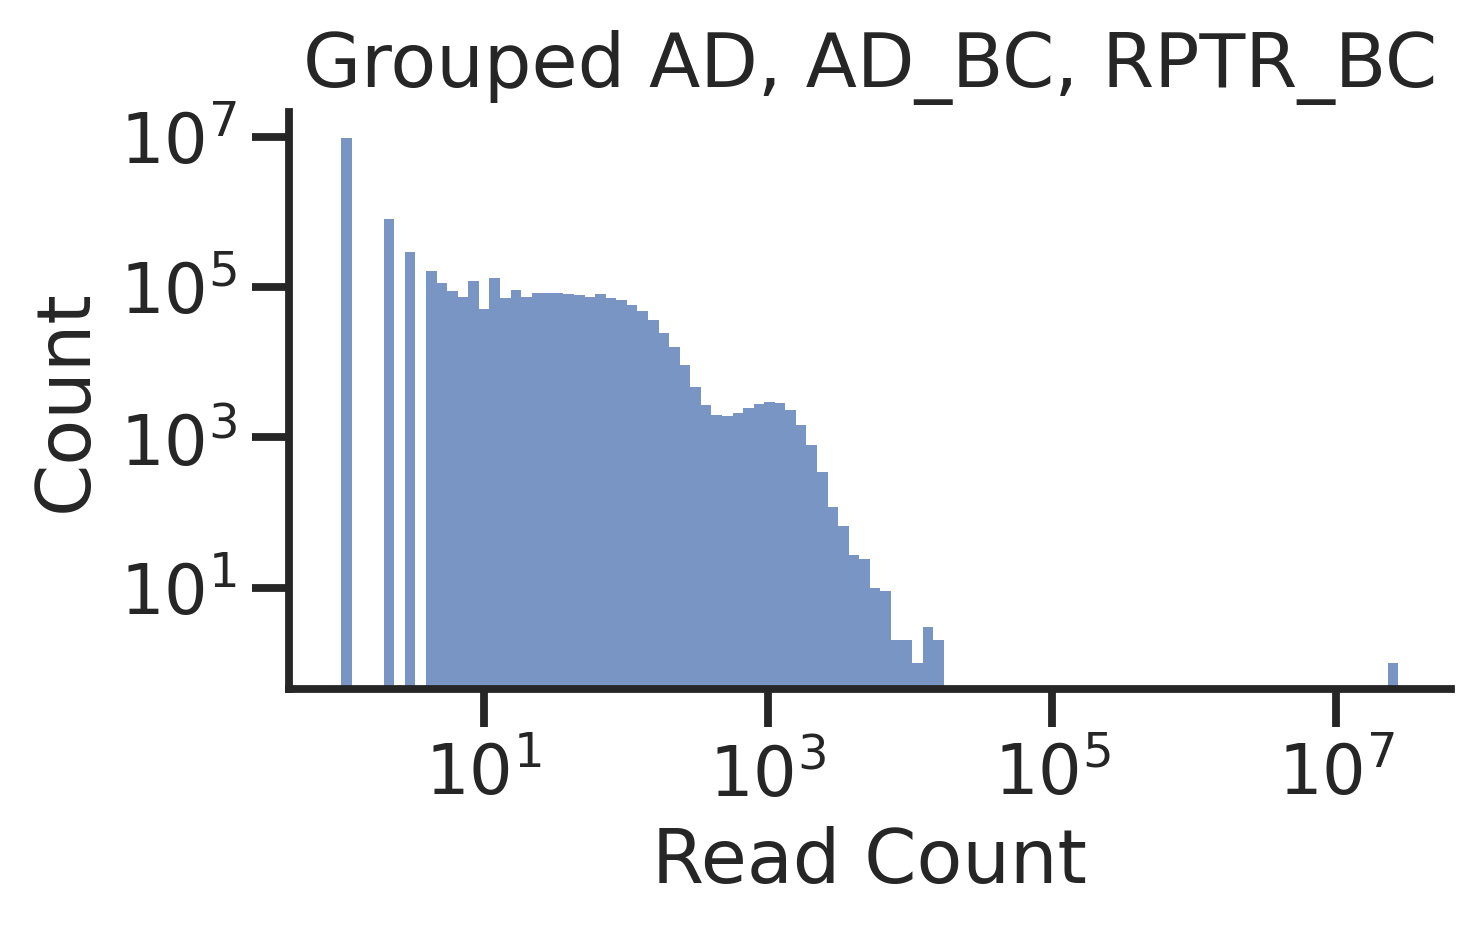

Done in 29.13 seconds.

Thresholding...
Using reads threshold of 50.


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

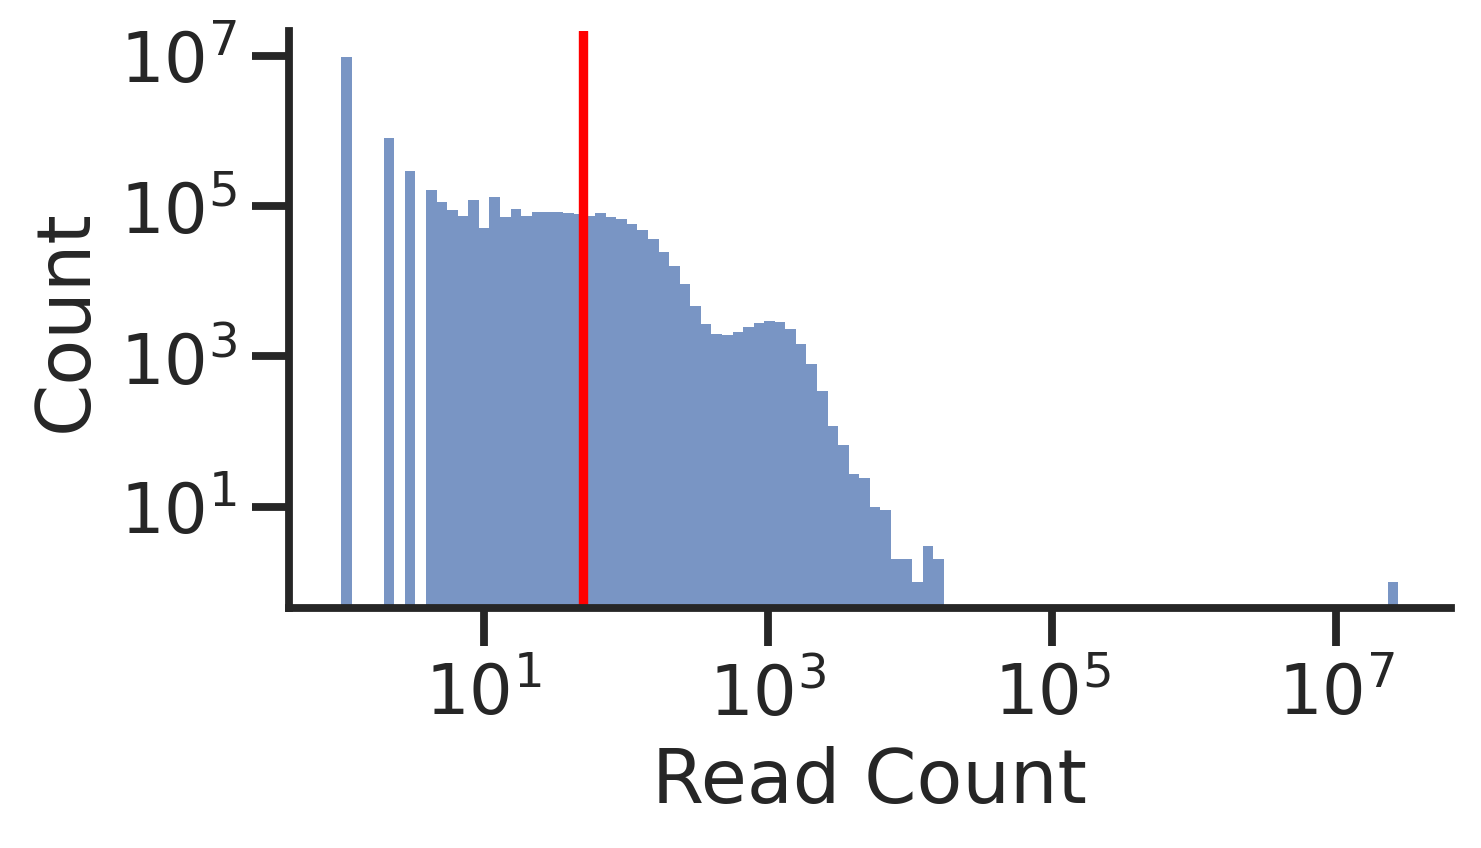

Done in 26.47 seconds.

Removing rows with null or empty barcodes (excluding AD)...
Done in 0.10 seconds.

Filtering keys to keep only those mapping to a single target...
	Checking each RPTR_BC only maps to one AD.
Done in 0.62 seconds.

Filtering to quality and designed...
Done in 0.05 seconds.

Done.


In [14]:
SK_order_refiner_with_post.refine_map_from_db()

Saved loss summary table as 'step1_AD_AD_BC_RPTR_BC_SK_order_loss_summary'
Done in 1.91 seconds.

Saved loss summary table as 'step1_AD_AD_BC_RPTR_BC_SK_order_loss_summary'
Done in 1.46 seconds.



<Axes: xlabel='Read Count (Unique, Total)', ylabel='Map Step'>

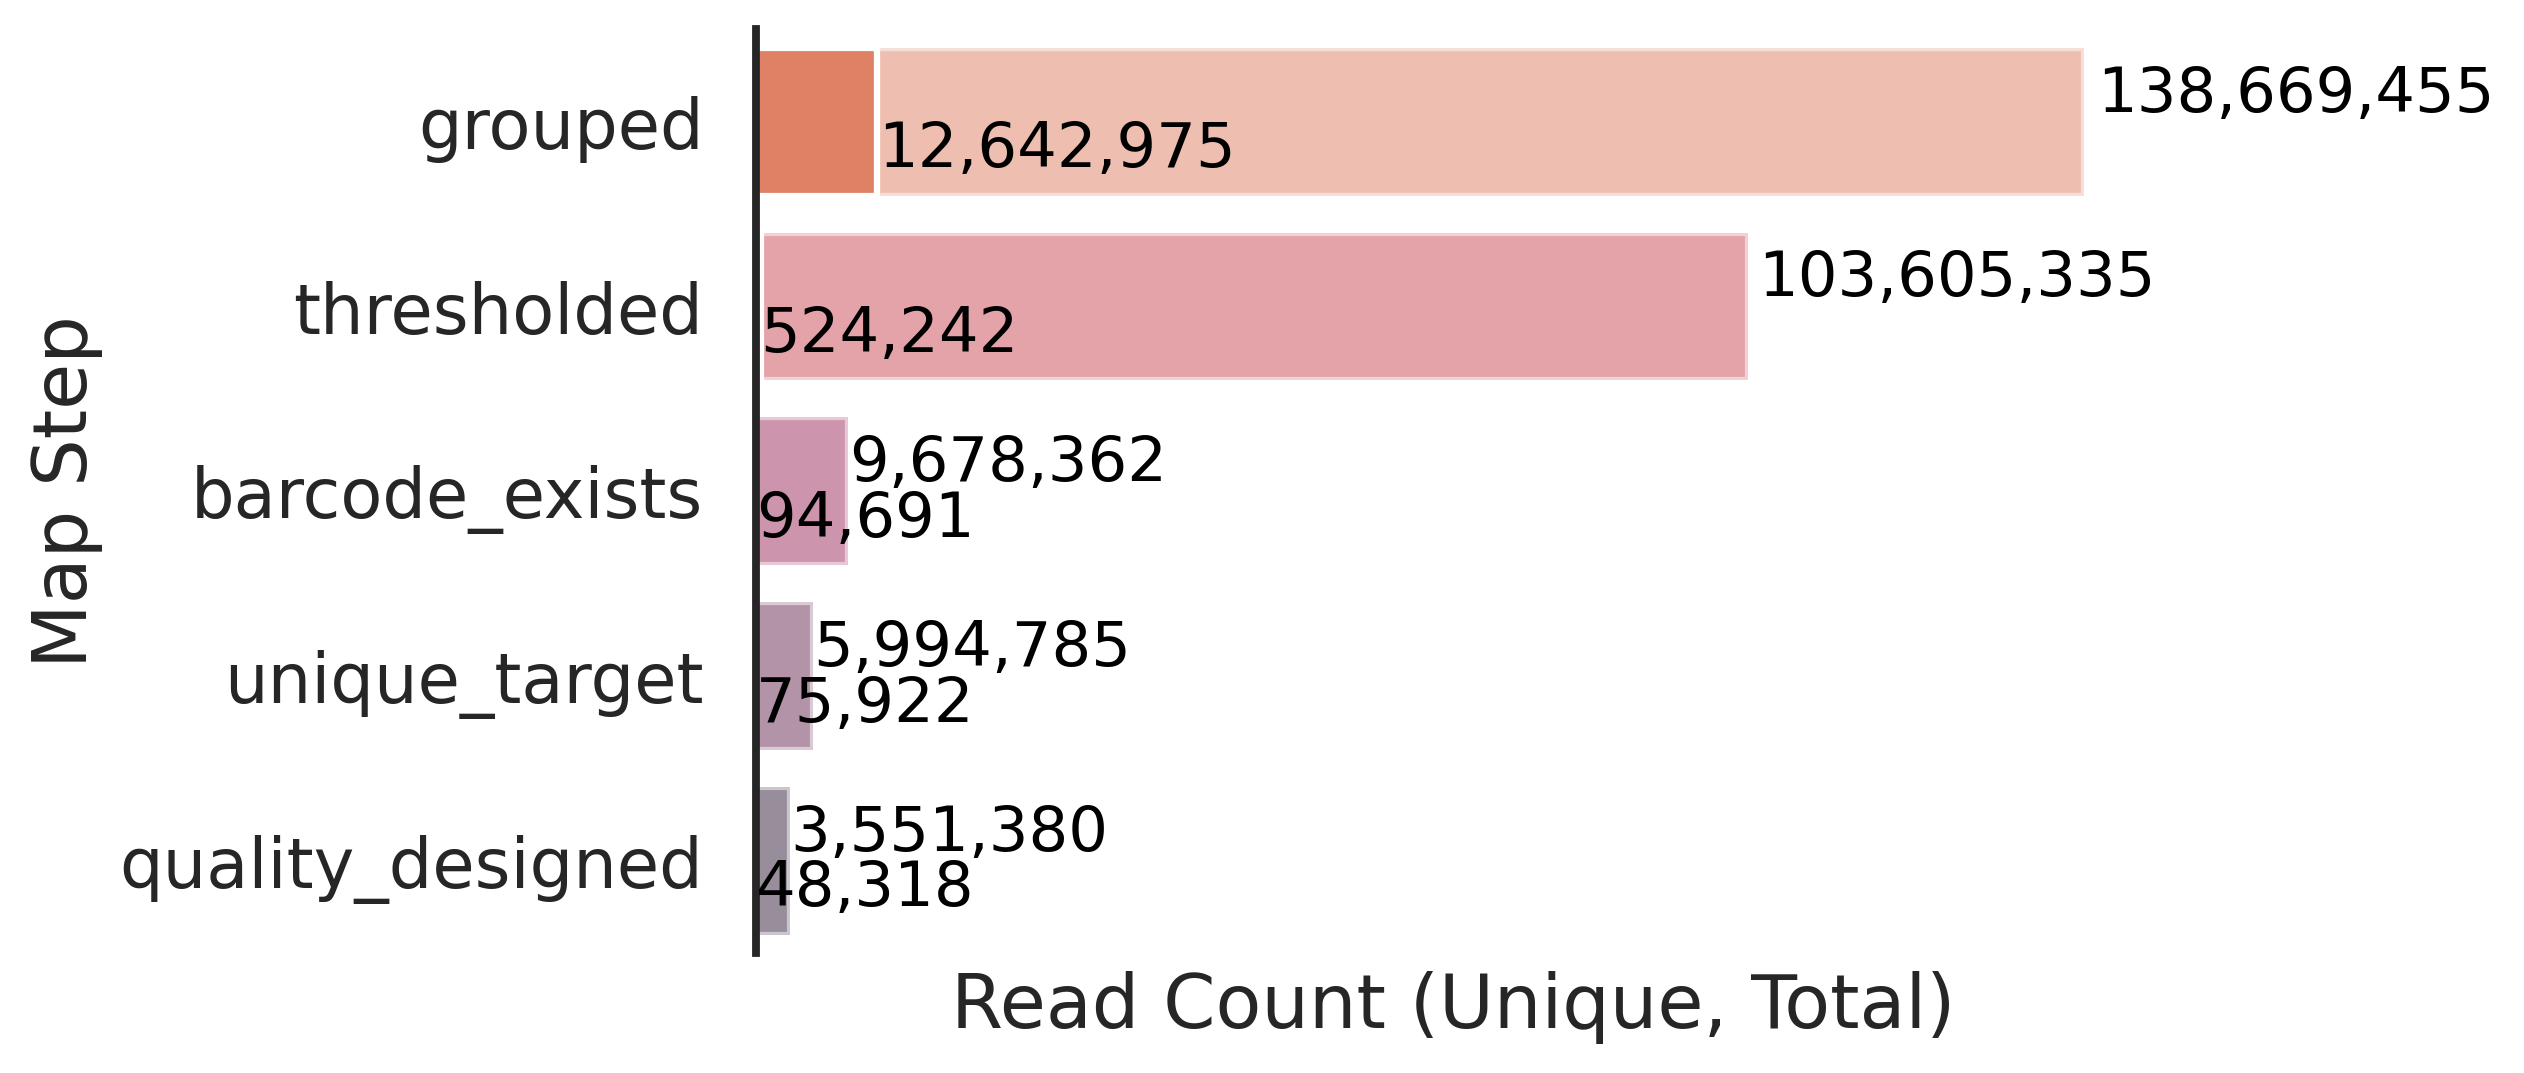

In [7]:
SK_order_refiner_with_post.save_loss_table()
SK_order_refiner_with_post.plot_loss(text_offset = -0.15)

Saved loss summary table as 'step1_AD_AD_BC_RPTR_BC_SK_order_loss_summary'
Done in 1.83 seconds.

Saved loss summary table as 'step1_AD_AD_BC_RPTR_BC_SK_order_loss_summary'
Done in 1.86 seconds.



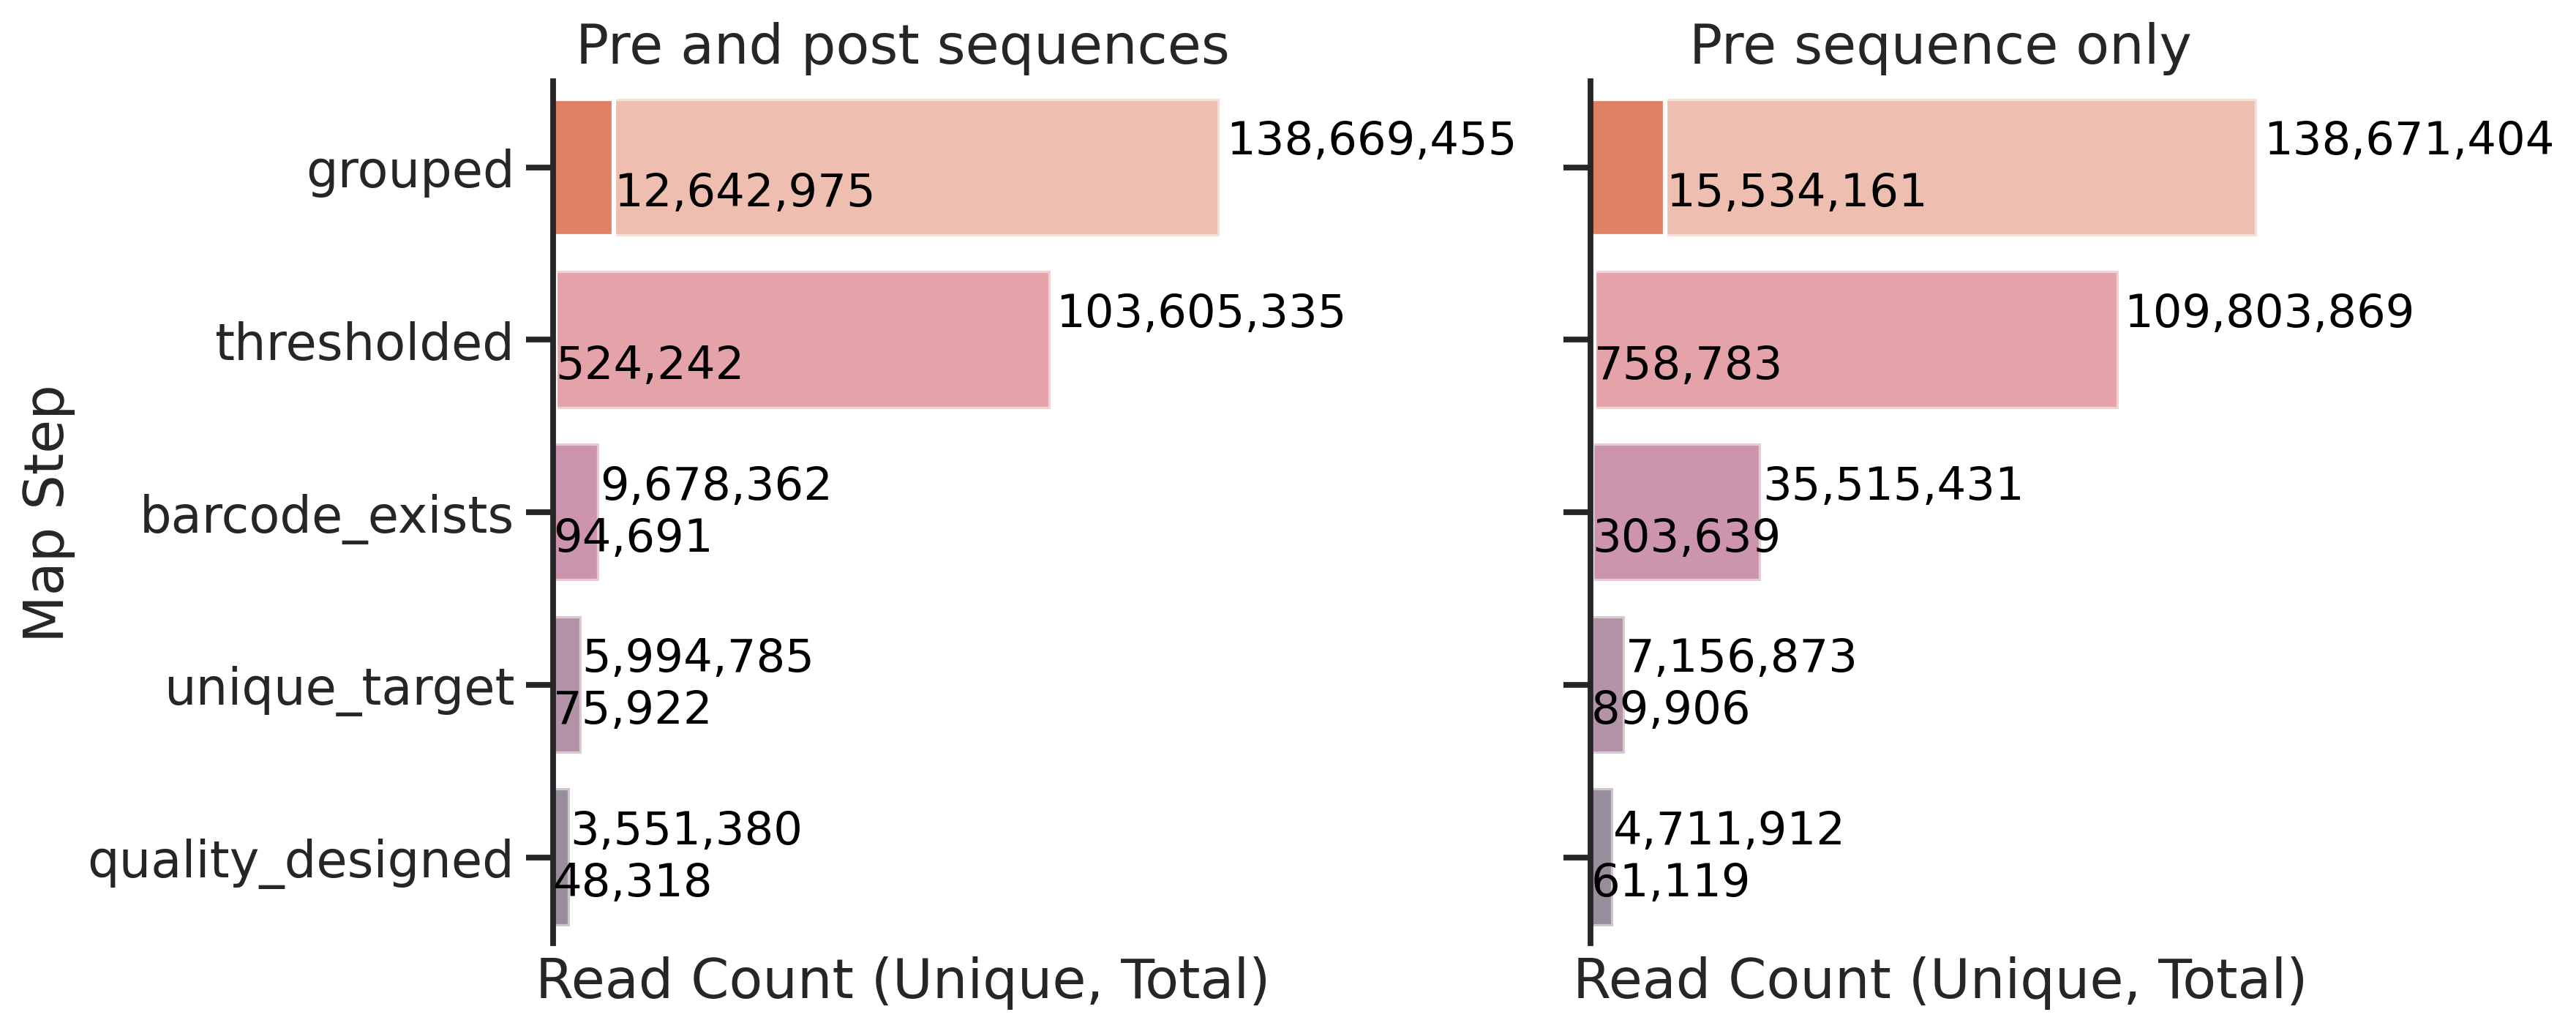

In [17]:
fig, axs = plt.subplots(1, 2, figsize = (12,5), dpi = 300, sharey = True, sharex = True)

SK_order_refiner_with_post.plot_loss(text_offset = -0.15, ax = axs[0])
axs[0].set_title("Pre and post sequences")

SK_order_refiner.plot_loss(text_offset = -0.15, ax = axs[1])
axs[1].set_title("Pre sequence only")
axs[1].set_ylabel("")

fig.tight_layout(pad = 1)